In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset from Data/ folder

In [3]:
data_path = '../Data/creditcard.csv'
df = pd.read_csv(data_path)

Displaying basic file info

In [4]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [5]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [6]:
print("\nClass Distribution:")
print(df['Class'].value_counts(normalize=True))


Class Distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


## Class Imbalance

The output of `value_counts(normalize=True)` clearly shows a significant class imbalance.
The vast majority of transactions are non-fraudulent (0), while fraudulent transactions (1) are a very small percentage.
This imbalance is a critical aspect to consider during model training, as standard classification algorithms can be biased towards the majority class.
Techniques like oversampling, undersampling, or using class weights will likely be necessary to build a robust fraud detection model.


Visualizing Class Distribution

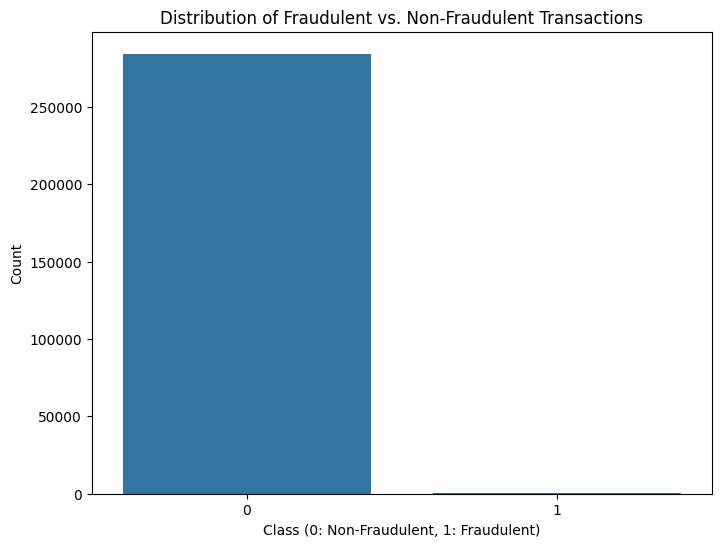

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

Understanding the distribution of transaction amounts can be helpful. Outliers or unusual patterns in transaction amounts might be indicative of fraudulent activity.

Visualizing Transaction Amount

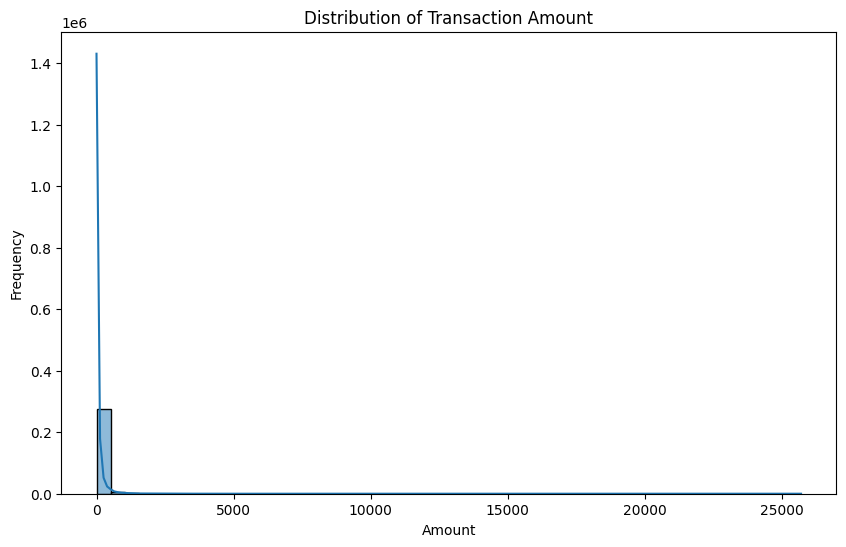

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Analyzing the transaction time might reveal temporal patterns in fraudulent activities. The 'Time' feature represents seconds elapsed since the first transaction.

Visualizing Time distribution (can give insights into when transactions occur)

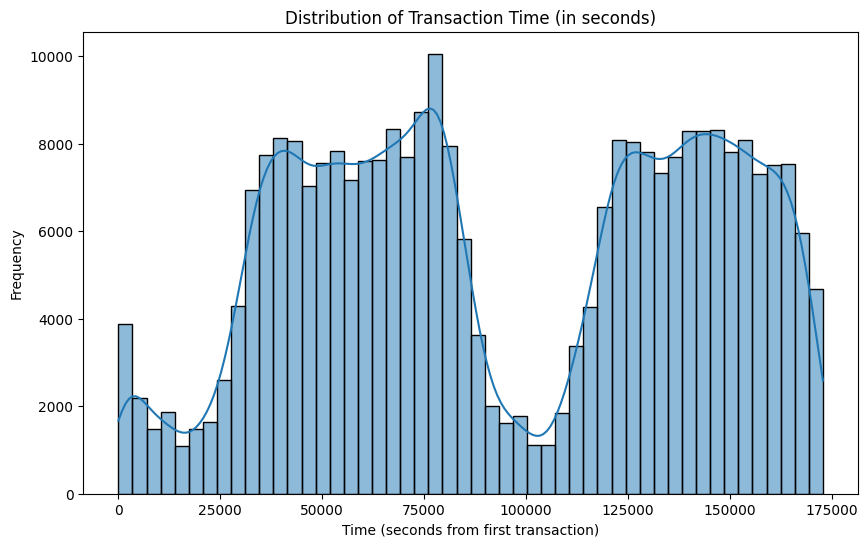

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time (in seconds)')
plt.xlabel('Time (seconds from first transaction)')
plt.ylabel('Frequency')
plt.show()

## Correlation Analysis

Examining the correlation between features might provide insights into relationships within the data.
While the PCA components are designed to be orthogonal (uncorrelated), it's still useful to look at correlations with 'Amount' and 'Class'.

Calculating and visualizing the correlation matrix

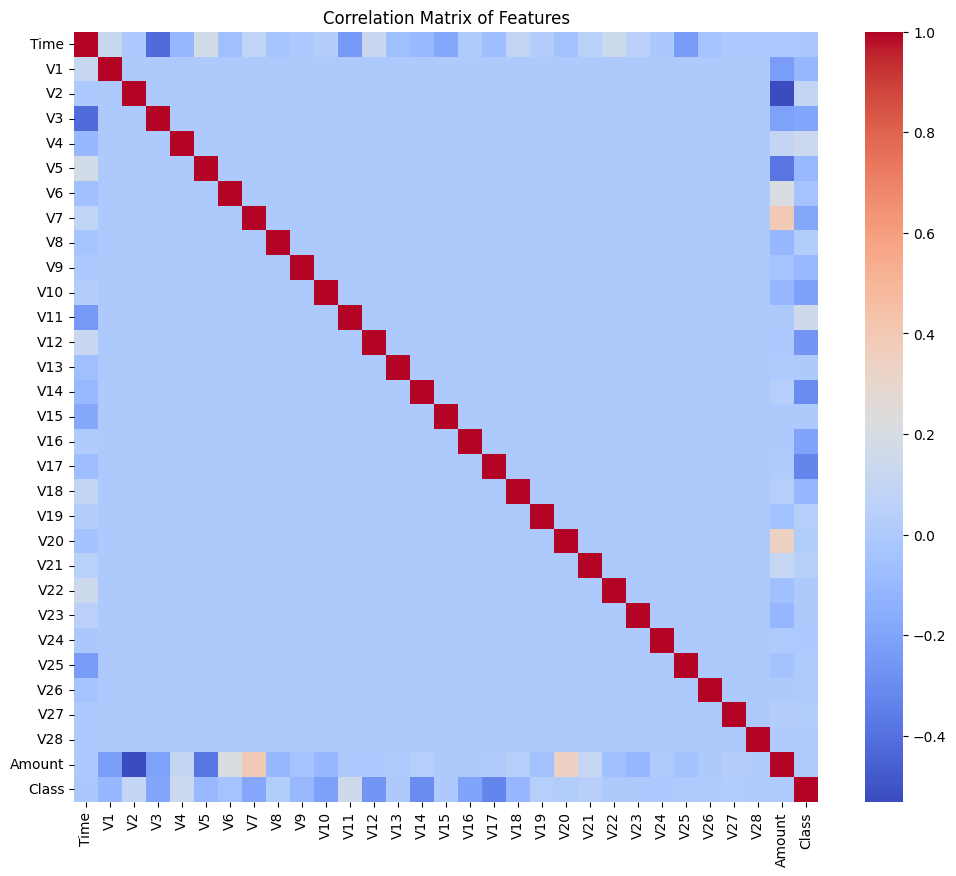


Correlation with the 'Class' variable:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()
print("\nCorrelation with the 'Class' variable:")
print(correlation_matrix['Class'].sort_values(ascending=False))

The correlation matrix shows the linear relationships between the features. Note that the PCA components (V1-V28) have been transformed to be largely uncorrelated with each other. However, observe their correlation with the target variable 'Class'. Some components might show a slightly stronger positive or negative correlation with fraud than others, which could be important for model building. Also, note the correlation between 'Amount' and 'Class'.